# MiniProject 2: Optimization and Text Classification

In [1]:
# Imports
import warnings
warnings.filterwarnings("ignore") 
import numpy as np
import pandas as pd
import sklearn
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

## Part 1: Optimization

### 1. Run the logistic regression code using the given implementation

In [2]:
# Given implementations
logistic = lambda z: 1./ (1 + np.exp(-z))  
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

In [3]:
# Run Logistic Regression
#(Find a learning rate and a number of training iterations such that the
# model has fully converged to a solution)

diabetes_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_test = pd.read_csv('./data_A2/diabetes/diabetes_test.csv', index_col=False, sep=',', engine='python')
diabetes_train = pd.read_csv('./data_A2/diabetes/diabetes_train.csv', index_col=False, sep=',', engine='python')
diabetes_val = pd.read_csv('./data_A2/diabetes/diabetes_val.csv', index_col=False, sep=',', engine='python')

x, y = diabetes_train.iloc[:,:-1].to_numpy(), diabetes_train.iloc[:,-1].to_numpy()
x_val, y_val = diabetes_val.iloc[:,:-1].to_numpy(), diabetes_val.iloc[:,-1].to_numpy()

# Plot accuracies for different leanring rates
# and different number of max iterations
def train_LR_models(x, y, rates, max_iters):
  models = list()

  for r in rates:
    _models = list()
    for iters in max_iters:
      model = LogisticRegression(True, r, 1e-4, iters)
      yh = model.fit(x,y)
      _models.append(model)
    models.append(_models)

  return models

def plot_LR_accuracies(models, x, y, title, rates, max_iters):
    accuracies = []

    for _models in models:
      _accuracies = list()
      for model in _models:
        yh = model.predict(x)
        y_pred = np.rint(yh)
        _accuracies.append(accuracy_score(y_pred, y))
      accuracies.append(_accuracies)

    i = 0
    max_acc = 0
    best_rate = 0
    for line in accuracies:
        m = max(line)
        if(m > max_acc): 
            max_acc = m
            best_rate = rates[i]
        plt.plot(line, label=str(rates[i]))
        i += 1

    max_iters_i = list(range(len(max_iters)))
    plt.title(title)
    plt.legend(loc='lower right')
    # plt.xticks(max_iters_i, max_iters)
    plt.xlabel('Max iterations')
    plt.ylabel('Accuracy score')
    plt.show()

    print('Best learning rate: ', best_rate)
    print('Maximum accuracy: ', max_acc)

First, we want to get an idea of the range we should be looking for for our learning rate. We start by looking at 0.0001, 0.001, and 0.1

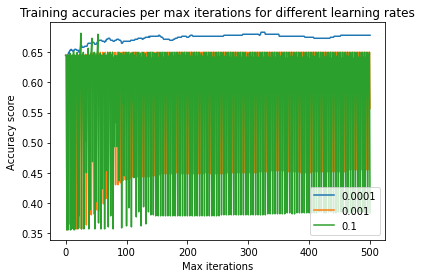

Best learning rate:  0.0001
Maximum accuracy:  0.6833333333333333


In [ ]:
rates = [0.0001, 0.001, 0.1]
max_iters = np.arange(0, 501, 1)

models = train_LR_models(x, y, rates, max_iters)

plot_LR_accuracies(models, x, y, 'Training accuracies per max iterations for different learning rates', rates, max_iters)

First, we want to get an idea of the range we should be looking for for our learning rate and maximum number of iterations. Below, we start by testing rates form 0.000001 to 0.0001 and maximum iterations from 0 to 10,000.
Note that the x axis in this case will be x100.

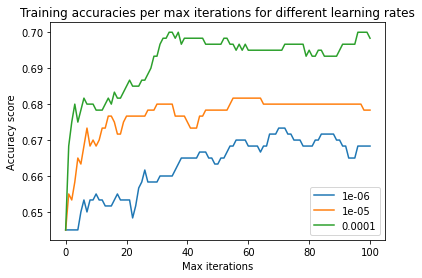

Best learning rate:  0.0001
Maximum accuracy:  0.7


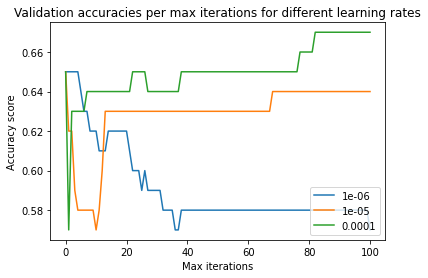

Best learning rate:  0.0001
Maximum accuracy:  0.67


In [ ]:
rates = [0.000001, 0.00001, 0.0001]
max_iters = np.arange(0, 10100, 100)

models = train_LR_models(x, y, rates, max_iters)

plot_LR_accuracies(models, x, y, 'Training accuracies per max iterations for different learning rates', rates, max_iters)
plot_LR_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different learning rates', rates, max_iters)

As we can see above, all three tested learning rates seem to become steady around 3,700 max iterations. The best learning rate is 0.0001 with an accuracy of 0.7. 
In the next steps, we will continue to play around with max_iters and learning rates around 0.0001.

Below, we will try to increase the learning rate (keeping 0.0001 as a base value). In order to see the effect of changing the learning rate only, we keep the same max iterations range for now.

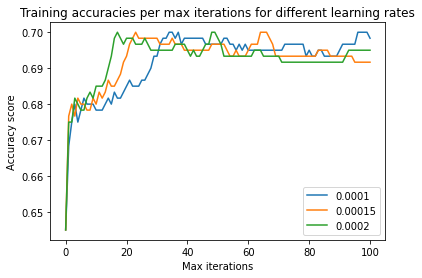

Best learning rate:  0.0001
Maximum accuracy:  0.7


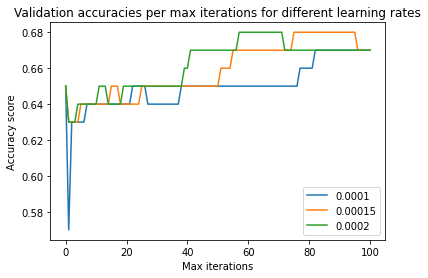

Best learning rate:  0.00015
Maximum accuracy:  0.68


In [ ]:
rates = [0.00010, 0.00015, 0.00020]
max_iters = np.arange(0, 10100, 100)

models = train_LR_models(x, y, rates, max_iters)

plot_LR_accuracies(models, x, y, 'Training accuracies per max iterations for different learning rates', rates, max_iters)
plot_LR_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different learning rates', rates, max_iters)

As before, 0.0001 gives the maximal accuracy. However, the accuracy scores seem to be converging faster using 0.0002 as a learning rate. Let's investigate that new learning rate (0.0002).
Since it seems the accuracy values are somewhat steady after 3,500 max iterations, we will continue investigating with only 5,000 max iterations to reduce running time.

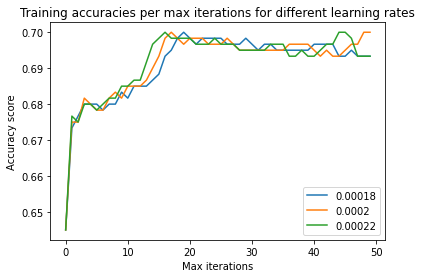

Best learning rate:  0.00018
Maximum accuracy:  0.7


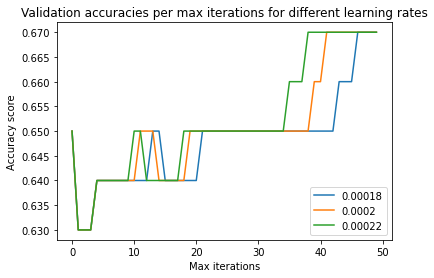

Best learning rate:  0.00018
Maximum accuracy:  0.67


In [ ]:
rates = [0.00018, 0.00020, 0.00022]
max_iters = np.arange(0, 5000, 100)

models = train_LR_models(x, y, rates, max_iters)

plot_LR_accuracies(models, x, y, 'Training accuracies per max iterations for different learning rates', rates, max_iters)
plot_LR_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different learning rates', rates, max_iters)

We are getting closer to finding a good learning rate. As we can see above, the training data converges around 2,000 max iterations with all 3 learning rates. 0.00022 is the first to converge.

Let's try a much larger accuracy value to compare with 0.00022.

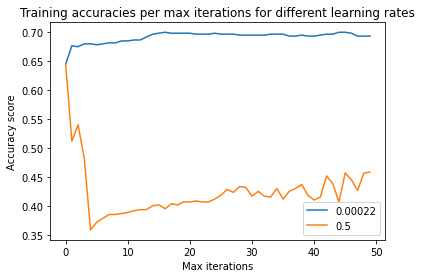

Best learning rate:  0.00022
Maximum accuracy:  0.7


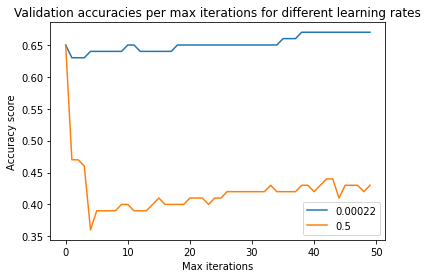

Best learning rate:  0.00022
Maximum accuracy:  0.67


In [ ]:
rates = [0.00022, 0.5]
max_iters = np.arange(0, 5000, 100)

models = train_LR_models(x, y, rates, max_iters)

plot_LR_accuracies(models, x, y, 'Training accuracies per max iterations for different learning rates', rates, max_iters)
plot_LR_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different learning rates', rates, max_iters)

Now let's try with a much smaller value.

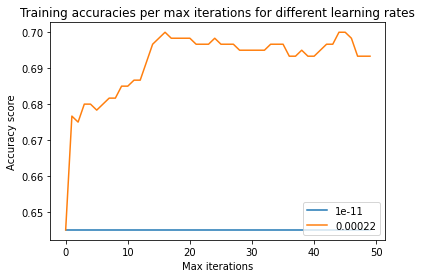

Best learning rate:  0.00022
Maximum accuracy:  0.7


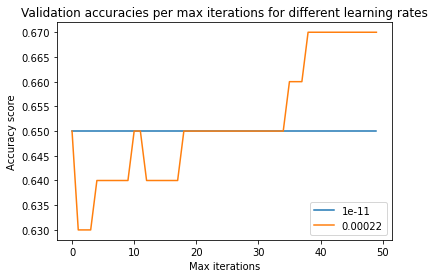

Best learning rate:  0.00022
Maximum accuracy:  0.67


In [ ]:
rates = [0.00000000001, 0.00022]
max_iters = np.arange(0, 5000, 100)

models = train_LR_models(x, y, rates, max_iters)

plot_LR_accuracies(models, x, y, 'Training accuracies per max iterations for different learning rates', rates, max_iters)
plot_LR_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different learning rates', rates, max_iters)

Finally, we fine tune around 0.00022.

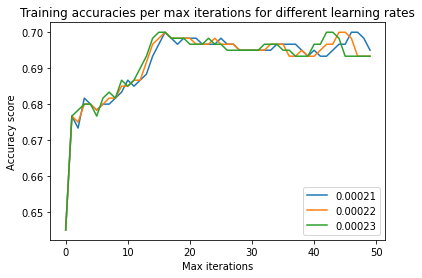

Best learning rate:  0.00021
Maximum accuracy:  0.7


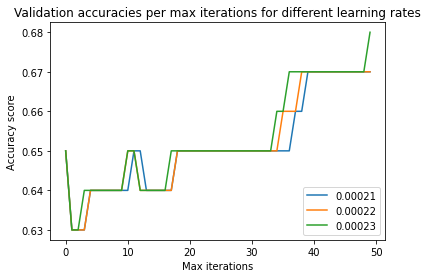

Best learning rate:  0.00023
Maximum accuracy:  0.68


In [ ]:
rates = [0.00021, 0.00022, 0.00023]
max_iters = np.arange(0, 5000, 100)

models = train_LR_models(x, y, rates, max_iters)

plot_LR_accuracies(models, x, y, 'Training accuracies per max iterations for different learning rates', rates, max_iters)
plot_LR_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different learning rates', rates, max_iters)

All curves are very similar in terms of convergence. We choose a learning rate of 0.00021 since it gives us the best accuracy for the same convergence.

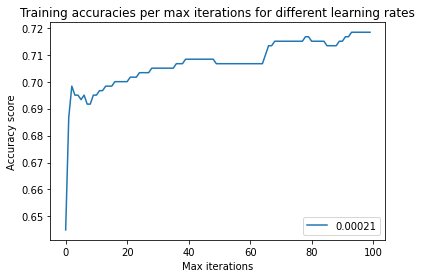

Best learning rate:  0.00021
Maximum accuracy:  0.7183333333333334


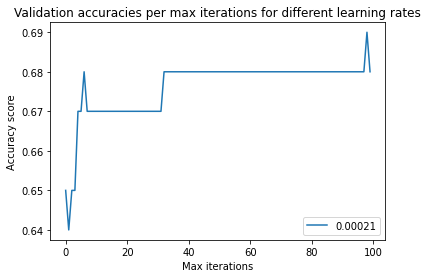

Best learning rate:  0.00021
Maximum accuracy:  0.69


In [ ]:
rates = [0.00021]
max_iters = np.arange(0, 100000, 1000)

models = train_LR_models(x, y, rates, max_iters)

plot_LR_accuracies(models, x, y, 'Training accuracies per max iterations for different learning rates', rates, max_iters)
plot_LR_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different learning rates', rates, max_iters)

We see that testing with a larger number of max iterations does not improve the accuracy much. This makes sense since we had found it started to converge to 0.7 around 3,000-4,000 max iterations.



---



### 2. Mini-Batch Gradient Descent

In [4]:
# Given implementations
logistic = lambda z: 1./ (1 + np.exp(-z))  

class GradientDescent:
  """
  Gradient Descent class implemented from lecture code
  """
  def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
    """
    Create an instance of the GradientDescent class

    Args:
      learning_rate: the speed at which to update weights
      max_iters: the maximum amount of times we should update values
      epsilon: the minimum amount of improvement (given by the gradient) before early termination
      record_history: whether to keep track of the weights at each iteration

    Returns:
      A new instance of GradientDescent
    """
    self.learning_rate = learning_rate
    self.max_iters = max_iters
    self.record_history = record_history
    self.epsilon = epsilon
    if record_history:
      self.w_history = []                 #to store the weight history for visualization
            
  def run(self, x, y):
    """
    A run method to perform gradient descent on a model

    Args:
      gradient_fn: a callable representing how to change our weights
      x: inputs
      y: expected values

    Returns:
      A matrix of final weights
    """
    grad = np.inf
    t = 1
    self.w = np.zeros(x.shape[1])

    while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
      w, grad = self.learn(x, y, w)
      t += 1

    self.w = w

  def learn(self, x, y, w):
    """
    Helper function to compute gradient and new weights

    Args:
      gradient_fn: a callable representing how to change our weights
      x: inputs
      y: expected values
      w: weights
    
    Returns:
      A tuple of new weights and gradient
    """
    grad = self.gradient(x, y)               # compute the gradient with present weight
    w_new = w - self.learning_rate * grad         # weight update step
    if self.record_history:
      self.w_history.append(w_new)
      
    return w_new, grad

  def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

  def predict(self, x):
    yh = logistic(np.dot(x,self.w))            #predict output
    return yh

class MiniBatch(GradientDescent):
  """
  A subclass of GradientDescent that performs mini batch gradient descent
  """
  def __init__(self, learning_rate=0.001, max_iters=1e4, epsilon=1e-8, record_history=False, batch_size=32):
    """
    Create instance of MiniBatch

    Args:
      batch_size: how many entries to train on before updating weights
    
    Returns:
      An instance of MiniBatch
    """
    super(MiniBatch, self).__init__(learning_rate, max_iters, epsilon, record_history)
    self.batch_size = batch_size

  def run(self, x, y):
    """
    Override run function of GradientDescent to perform updates on batches
    """
    grad = np.inf
    t = 0
    self.w = np.zeros(x.shape[1])
    w = self.w

    while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
      for x_batch, y_batch in self.batch(x, y):
        w, grad = self.learn(x_batch, y_batch, w)
        print(f'Accuracy on iteration {t}: {accuracy_score(y_batch, np.rint(self.predict(x_batch)))}')

      t += 1

    self.w = w

  def batch(self, x, y):
    """
    Generator retrieve the next batch of training data and labels

    Args:
      x: training data as a numpy array
      y: training labels as a numpy array

    Returns:
      A tuple of training data and labels
    """
    for i in range(0, len(x), self.batch_size):
      end = min(i+self.batch_size, len(x))
      yield x[i:end], y[i:end]

In [ ]:
diabetes_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_test = pd.read_csv('./data_A2/diabetes/diabetes_test.csv', index_col=False, sep=',', engine='python')
diabetes_train = pd.read_csv('./data_A2/diabetes/diabetes_train.csv', index_col=False, sep=',', engine='python')
diabetes_val = pd.read_csv('./data_A2/diabetes/diabetes_val.csv', index_col=False, sep=',', engine='python')

x, y = diabetes_train.iloc[:,:-1].to_numpy(), diabetes_train.iloc[:,-1].to_numpy()
x_val, y_val = diabetes_val.iloc[:,:-1].to_numpy(), diabetes_val.iloc[:,-1].to_numpy()

# Plot accuracies for different batch sizes
# and different number of max iterations
def train_minibatch_models(x, y, batch_sizes):
  models = list()

  for batch_size in batch_sizes:
    model = MiniBatch(0.00021, 1e4, 1e-4, batch_size=batch_size)
    model.run(x, y)
    models.append(model)

  return models

def plot_minibatch_accuracies(models, x, y, title, batch_sizes):
    accuracies = []

    for model in models:
      yh = model.predict(x)
      y_pred = np.rint(yh)
      score = accuracy_score(y, y_pred)
      print(f'Accuracy Score for model with batch size {model.batch_size}: {score}')
      accuracies.append(score)
    
    i = 0
    max_acc = 0
    best_batch = 0
    max_acc = max(accuracies)
    best_size = batch_sizes[np.argmax(accuracies)]
    plt.plot(batch_sizes, accuracies, label='Accuracy')

    plt.title(title)
    plt.legend(loc='lower right')
    plt.xlabel('Batch Size')
    plt.ylabel('Accuracy score')
    plt.show()

    print('Best batch size: ', best_size)
    print('Maximum accuracy: ', max_acc)

In [ ]:
batch_sizes = 2 ** np.arange(1, 8)
max_iters = np.arange(100, 2001, 100)

models = train_minibatch_models(x, y, batch_sizes)

plot_minibatch_accuracies(models, x, y, 'Training accuracies per max iterations for different batch sizes', batch_sizes)
plot_minibatch_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different batch sizes', batch_sizes)

Streaming output truncated to the last 5000 lines.
Accuracy on iteration 99: 0.5
Accuracy on iteration 99: 1.0
Accuracy on iteration 99: 1.0
Accuracy on iteration 99: 1.0
Accuracy on iteration 99: 0.0
Accuracy on iteration 99: 0.0
Accuracy on iteration 99: 0.5
Accuracy on iteration 100: 0.0
Accuracy on iteration 100: 0.0
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 0.0
Accuracy on iteration 100: 0.0
Accuracy on iteration 100: 1.0
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 1.0
Accuracy on iteration 100: 0.0
Accuracy on iteration 100: 1.0
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 1.0
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 1.0
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 1.0
Accuracy on iteration 100: 1.0
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 0.5
Accuracy on iteration 100: 1.0
Accuracy on iteration 100:

KeyboardInterrupt: ignored

In [ ]:
models[0][0].w, models[1][0].w

(array([ -0.3170475 , -16.06677187, -14.88564   ,  -3.79547437,
         -3.7058175 ,  -5.58445388,  -0.06708413,  -5.43008812]),
 array([-0.14617969, -7.70074594, -7.32197813, -1.88864156, -1.55080406,
        -2.7390825 , -0.03185938, -2.61759094]))

### 3. Momentum with Gradient Descent

In [ ]:
def MomentumGradientDescent(MiniBatch):
  """
  Subclass of MiniBatch to perform gradient descent with momentum
  """
  def __init__(self, learning_rate=0.001, max_iters=1e4, epsilon=1e-8, record_history=False, batch_size=32, momentum=0.9):
    """
    Create instance of MomentumGradientDescent

    Args:
      momentum: the weighting of old gradients vs new gradients (0 = all new, 1 = all old)

    Returns:
      An instance of MomentumGradientDescent
    """
    super.__init__(self, learning_rate, max_iters, epsilon, record_history, batch_size)
    self.momentum = momentum

  def learn(self, gradient_fn, x, y, w):
    """
    Override learn function to apply momentum
    """
    grad = gradient_fn(x, y, w)
    w_t = self.momentum * w + (1 - self.momentum) * grad
    w_new = w - self.learning_rate * w_t
    if self.record_history:
      self.w_history.append(w_new)

    return w_new, grad

In [ ]:
# Plot accuracies for different momentums
# and different number of max iterations
def train_momentum_models(gradient_fn, x, y, momentums, max_iters, batch_size):
  models = list()

  for momentum in momentums:
    _models = list()
    for iters in max_iters:
      model = MomentumGradientDescent(0.0021, iters, 1e-4, batch_size=batch_size, momentum=momentum)
      model.run(gradient_fn, x, y)
      _models.append(model)
    
    models.append(_models)

  return models

def plot_momentum_accuracies(models, x, y, title, momentums, max_iters):
    accuracies = []

    for _models in models:
      _accuracies = list()
      for model in _models:
        yh = model.predict(x)
        y_pred = np.rint(yh)
        _accuracies.append(accuracy_score(y_pred, y))
      accuracies.append(_accuracies)
    
    i = 0
    max_acc = 0
    best_momentum = 0
    for line in accuracies:
        m = max(line)
        if(m > max_acc): 
            max_acc = m
            best_size = momentums[i]
        plt.plot(line, label=str(momentums[i]))
        i += 1

    plt.title(title)
    plt.legend(loc='lower right')
    plt.xlabel('Max iterations')
    plt.ylabel('Accuracy score')
    plt.show()

    print('Best momentum: ', best_momentum)
    print('Maximum accuracy: ', max_acc)

In [ ]:
momentums = np.arange(.9, 1.0, .01)
max_iters = np.arange(100, 1001, 100)

models = train_momentum_models(gradient, x, y, momentums, max_iters, 1)

plot_momentum_accuracies(models, x, y, 'Training accuracies per max iterations for different momentums', momentums, max_iters)
plot_momentum_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different momentums', momentums, max_iters)

In [ ]:
models = train_momentum_models(gradient, x, y, momentums, max_iters, 8)

plot_momentum_accuracies(models, x, y, 'Training accuracies per max iterations for different momentums', momentums, max_iters)
plot_momentum_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different momentums', momentums, max_iters)

In [ ]:
models = train_momentum_models(gradient, x, y, momentums, max_iters, 128)

plot_momentum_accuracies(models, x, y, 'Training accuracies per max iterations for different momentums', momentums, max_iters)
plot_momentum_accuracies(models, x_val, y_val, 'Validation accuracies per max iterations for different momentums', momentums, max_iters)

## Part 2: Text Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [ ]:
fake_news_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_A2/fake_news/fake_news_train.csv', index_col=False, sep=',',  engine='python')
fake_news_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_A2/fake_news/fake_news_test.csv', index_col=False, sep=',',  engine='python')
fake_news_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_A2/fake_news/fake_news_val.csv', index_col=False, sep=',',  engine='python')

In [ ]:
X_train, y_train = fake_news_train['text'].to_frame(), fake_news_train['label'].to_frame()
X_train.columns = ['text']
y_train.columns = ['label']

X_val, y_val = fake_news_val['text'].to_frame(), fake_news_val['label'].to_frame()
X_val.columns = ['text']
y_val.columns = ['label']

X_test, y_test = fake_news_test['text'].to_frame(), fake_news_test['label'].to_frame()
X_test.columns = ['text']
y_test.columns = ['label']

X_train_new, y_train_new = X_train.append(X_val), y_train.append(y_val)

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(max_iter=150)),
])

In [ ]:
parameters = {
    'clf__penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'clf__C': [1e-1, 1, 10, 25, 50, 100],
    }

In [ ]:
gs_clf = GridSearchCV(text_clf, param_grid = parameters, scoring='accuracy', n_jobs=-1, cv=5)

In [ ]:
gs_clf.fit(X_train_new['text'], y_train_new['label'])

In [ ]:
#Predict values based on new parameters
y_pred_acc = gs_clf.predict(X_test['text'])

In [ ]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test['label'],y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)) + '\n')

#Logistic Regression (Grid Search) Confusion matrix
print(str(confusion_matrix(y_test,y_pred_acc)) + '\n')

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Accuracy Score : 0.7436666666666667
Precision Score : 0.7534177215189873
Recall Score : 0.8406779661016949
F1 Score : 0.7946595460614152

[[ 743  487]
 [ 282 1488]]

clf__C: 10
clf__penalty: 'l2'
clf__solver: 'sag'


## Remove Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
X_train_new['No Stopwords'] = X_train_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
X_test['No Stopwords'] = X_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
print(X_train_new)
print(X_test)

                                                   text                                       No Stopwords
0     Indian fruit is so important to so many people...  Indian fruit important many people. Now season...
1     FORT WORTH, Texas — Urú Inc. will hold a confe...  FORT WORTH, Texas — Urú Inc. hold conference c...
2     With three of the four new carriers, the Niger...  With three four new carriers, Nigerian Airspac...
3     Let's start with the classic annual dividend r...  Let's start classic annual dividend reinvestme...
4     Following are some of the major events to have...  Following major events occurred Apr 08 Reuters...
...                                                 ...                                                ...
1995  KABUL - In past several weeks, hectic negotiat...  KABUL - In past several weeks, hectic negotiat...
1996  1) Where is Wan-Bissaka in the young player sh...  1) Where Wan-Bissaka young player shortlist? T...
1997  It may seem counterintuitive th

In [ ]:
gs_clf_stop = GridSearchCV(text_clf, param_grid = parameters, scoring='accuracy', n_jobs=-1, cv=5)

In [ ]:
gs_clf_stop.fit(X_train_new['No Stopwords'], y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [ ]:
#Predict values based on new parameters
y_pred_acc_stop = gs_clf_stop.predict(X_test['No Stopwords'])

In [ ]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc_stop)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc_stop)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc_stop)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc_stop)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc_stop)

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf_stop.best_params_[param_name]))

Accuracy Score : 0.7226666666666667
Precision Score : 0.7359154929577465
Recall Score : 0.8265536723163842
F1 Score : 0.7786056412985631
clf__C: 10
clf__penalty: 'l2'
clf__solver: 'saga'
